# Problem Statement for the Advertising data
The dataset file consists of advertising expenditure incurred on different mediums and the overall increase in revenue that was seen during that time. For any business, advertising their products is very essential because it aids in the fast selling of a product, increases the popularity and awareness of the product in the market, which in turn, increases the overall sales for the product. But more than that, what matters for the business is that correct amount of investment should be done upon the advertisements such that it generates good return on investments otherwise it will just lead to an added expenditure.
The dataset contains statistics about the increase in sales of a product in 200 different months, together with advertising budgets in each of these months for different media channels: TV, radio and newspaper. The budget and the increase in sales is in thousands of dollars. 
You are expected to implement regression technique and predict what would be the increase in sales given the advertisement expenditure for that month. You are free to use any ML algorithms, evaluate, fine tune and reach a best model. Also derive additional/meaningful insights from the data which can help the organization to decide upon the right channels and amount of investments to be done on each media channel. 


# Steps for Linear Regression:
1. *Create the dataframe properly-->pd.read_csv(),pd.read_excel()
2. *Preprocessing the data:
	a. Feature selection-->domain knowledge,drop()
	b. Handling missing values-->isnull().sum(),fillna(),dropna()
3. Assumption 1: There should be no outliers in the data-->boxplot()
4. *Assumption 2: Assumption of Linearity:Every ind var should have a linear relationship with the dep var-->pairplot(), drop()
5. *Create X and Y-->X=ind var, Y=dep var
6. Assumption 3: Assumption of Normality: The dependent variable should follow an approximate normal distribtion-->distplot(),log()
7. Checking and handling the skewness in the X vars-->skew(),hist(),log1p()
8. Assumption 4: Assumption of no multicollinearity: There should be no multicollinearity between the independent variables-->corr(),heatmap(),vif(),drop()
9. *Splitting the data into train and test(validation)-->train_test_split()
10. *Building the model:
	a. Create the model-->obj=AlgoName()
	b. Train the model-->obj.fit(X_train, Y_train)
	c. Predict using the model-->Y_pred=obj.predict(X_test)
11. *Evaluating the model:
	R-squared, Adj R-squared, RMSE, AIC/BIC
12. Assumption 5: There should be no auto-correlation in the data-->Durbin Watson test
13. Assumption 6: Errors should be random-->Fitted v/s Residual plot
14. Assumption 7: Errors should follow an approx normal distribution-->Normal QQ plot
15. Assumption 8: Errors should should follow a constant variance(Homoskedasticity)-->Scale Location plot
16. *Tuning the model:
	a. Feature selection-->p-values,domain knowledge
	b. Regularization techniques-->Ridge(), Lasso()
	c. Stochastic Gradient Descent-->SGDRegressor()


# BUILDING MODAL

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv(r"C:\Users\razas\Downloads\Advertising.csv",header =0,index_col=0)
data

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [3]:
data.head() 

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
print(data.dtypes)
print(data.shape)
print(data.describe())

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object
(200, 4)
               TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000


In [5]:
data.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

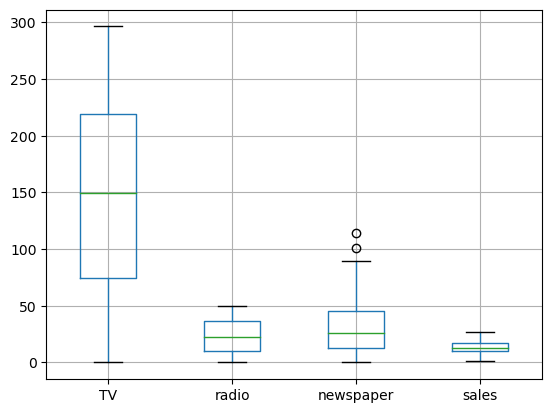

In [6]:
data.boxplot() 
plt.show()          ####### Checkingh outliers

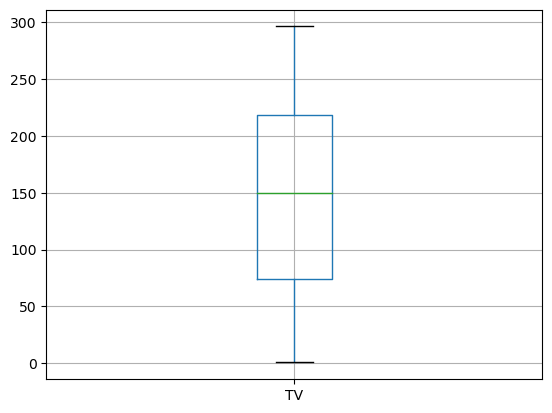

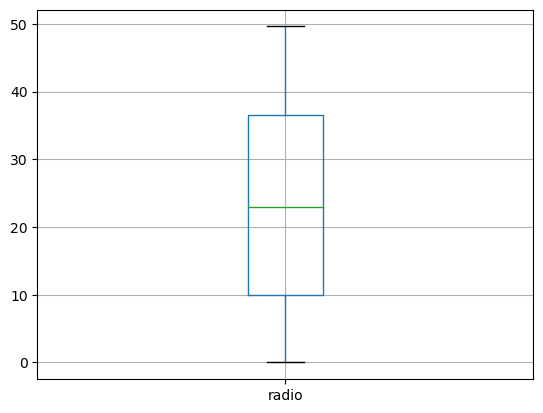

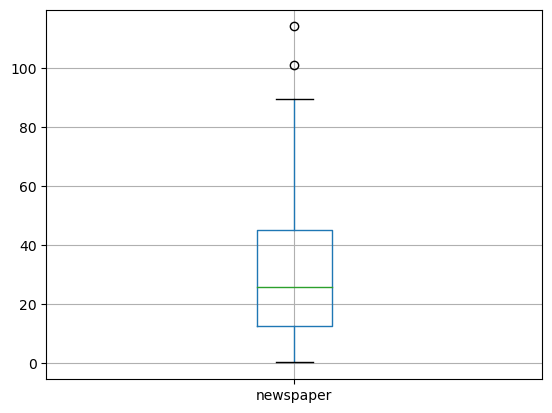

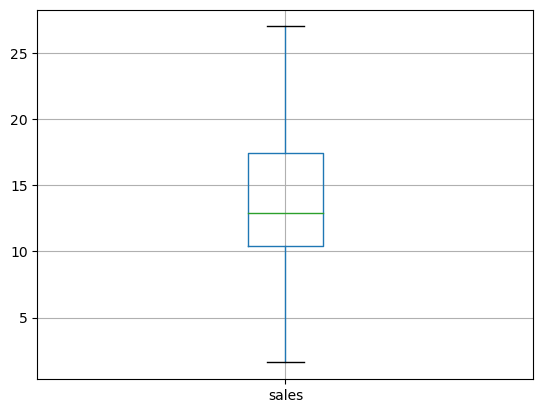

In [7]:
## Assumption 1
# There should be no out liers in data.
# check using boxplot.

for i in data.columns:
    data.boxplot(column=i)
    plt.show()               ### graph gets affected  due to  the one varible of the range


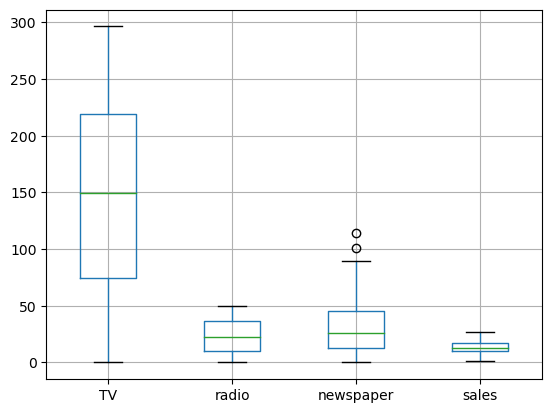

In [8]:
data.boxplot()
plt.show()

In [9]:
#data.drop(data[data['newspaper']>=90].index,axis=0,inplace=True)   #### relevent h to drop nhi krenge 

In [10]:
data[data['newspaper']>=90].index


Int64Index([17, 102], dtype='int64')

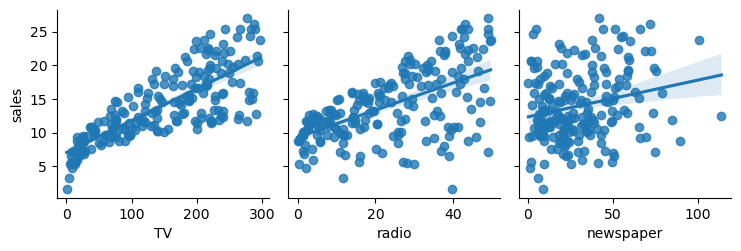

In [11]:
##Assumption 2: Assumption of linearity: Every ind var sould have a linear relationship with the dep var.

sns.pairplot(data,x_vars=['TV','radio','newspaper'],
            y_vars=['sales'],kind='reg')
plt.show()           ####v strong ,postive linear relationship over here 

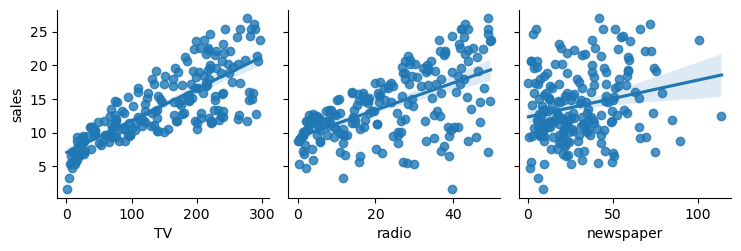

In [12]:

sns.pairplot(data,x_vars=['TV','radio','newspaper'],
            y_vars=['sales'],kind='reg')
plt.show()

In [13]:
# data.drop(['newspaper'],axis=1,inplace=True)    ### we can drop the var which shows no LR with the Y varible

In [14]:
data.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [15]:
X = data.loc[:,['TV','radio','newspaper']]
Y=data.loc[:,'sales']
#X=data.iloc[:,0:-1]
#Y=data.iloc[:,-1]

In [16]:
print(X.shape)
print(Y.shape)

(200, 3)
(200,)


In [17]:
## I LOC

In [18]:
X=data.iloc[:,0:-1]
Y=data.iloc[:,-1]

In [19]:
print(X.shape)
print(Y.shape)

(200, 3)
(200,)


In [20]:
import warnings
warnings.filterwarnings("ignore")

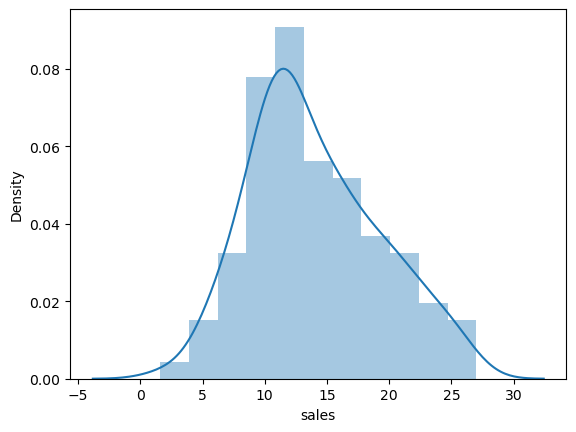

In [21]:
#Assumption of Normality: The depedent variable should follow an appropriate normal distribution

sns.distplot(Y,kde=True)
plt.show()

In [22]:
'''
#Log transformation
import numpy as np
Y_log = np.log(Y)
  ######### in case the data looks skewed wed can eliminate the outlier if need be we can perfom log transformation  
'''
  

'\n#Log transformation\nimport numpy as np\nY_log = np.log(Y)\n  ######### in case the data looks skewed wed can eliminate the outlier if need be we can perfom log transformation  \n'

In [23]:
#sns.distplot(Y_log)
#plt.show()

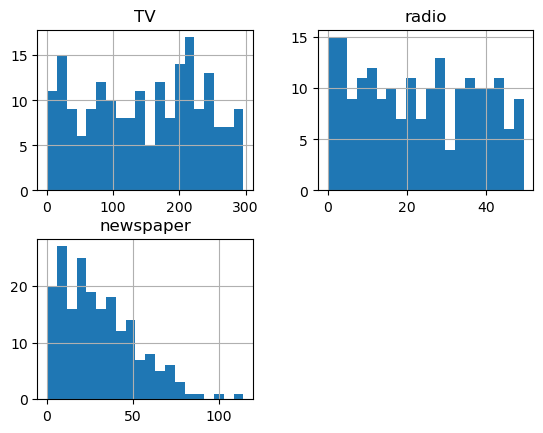

In [24]:
X.hist(bins=20)
plt.show()          ## skewness ko reduce krne ke liye

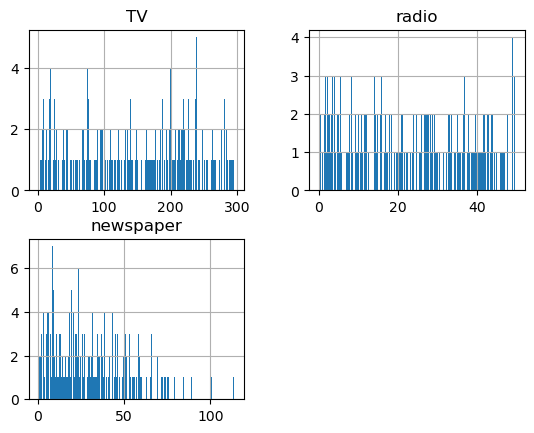

In [25]:
X.hist(bins=200)
plt.show()

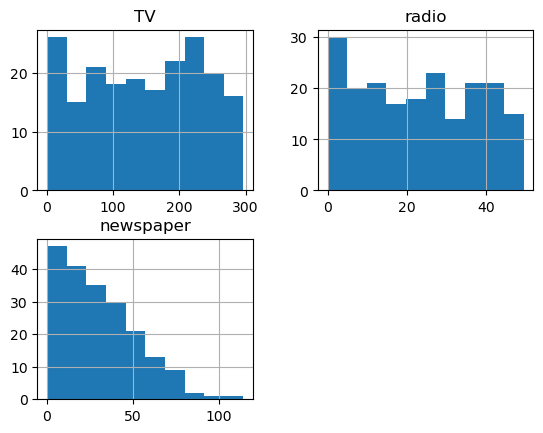

In [26]:
X.hist(bins=10)
plt.show()

In [27]:
from scipy.stats import skew
#finding the skewness in each variable
data_num_skew = X.apply(lambda i: skew(i.dropna())) ## lambda function is temporary function 
#subsetting the variables that are highly skewed       ##### this first variable i is pointing to tv( i me 3 variable hai)
data_num_skewed = data_num_skew[(data_num_skew > .75) | (data_num_skew < -.75)]   ## highly skewed variable ko data_num_ske me 
                                                                                  # store krke print
print(data_num_skew)
print(data_num_skewed)
import numpy as np
                                                                    
# apply log + 1 transformation for all numeric features with skewness over .75

X[data_num_skewed.index] = np.log1p(X[data_num_skewed.index])
#X["newspaper"] = np.log1p(X["newspaper"])

# lambda itretor variable hai 

TV          -0.069328
radio        0.093467
newspaper    0.887996
dtype: float64
newspaper    0.887996
dtype: float64


In [28]:
  ### For self check only 

from scipy.stats import skew 
# finding the skewness in each variable 
data_num_skew=X.apply(lambda i: skew(i.dropna()))
data_num_skewed=data_num_skew[(data_num_skew>.75)|(data_num_skew< -.75)]
print(data_num_skew)
print(data_num_skew)
import numpy as np
X[data_num_skewed.index]=np.log1p(X[data_num_skewed.index])

TV          -0.069328
radio        0.093467
newspaper   -0.793863
dtype: float64
TV          -0.069328
radio        0.093467
newspaper   -0.793863
dtype: float64


In [29]:
data_num_skewed.index

Index(['newspaper'], dtype='object')

                 TV     radio  newspaper
TV         1.000000  0.054809   0.018988
radio      0.054809  1.000000   0.207854
newspaper  0.018988  0.207854   1.000000


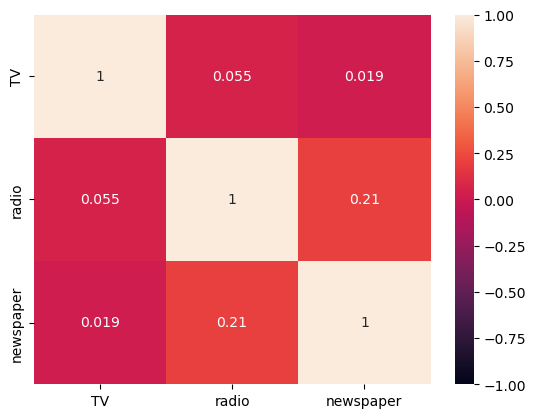

In [30]:
## assumption of no multicolliniarity : there should be no multicolliniarity between the indipendent var
##multicolliniarity is the relationship amongst the multiple independent var

corr_df = X.corr(method='pearson')
print(corr_df)

sns.heatmap(corr_df,vmax=1.0,vmin=-1.0,annot=True)
plt.show()

 We do not see any pair of var with high correlation

In [31]:
# y variable me zero value ho skta hai aur agar y variable ko log tansform kr rhe h to vaha problem aayega( Log 0 = -infinite)
#infinte value me log transformation kam nahi krega (log+1) transformation krna hai vaha pr 

In [32]:
## modal hai ye ............log log modal ,,,, log level modaL ,,,,, level log modal,,,,, level level modal

# A variance inflation factor (VIF) is a measure of the amount of multicollinearity in regression analysis.

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
vif_df= pd.DataFrame()
vif_df["features"]=X.columns
vif_df["VIF Factor"]=[vif(X.values,i)for i in range(X.shape[1])]
vif_df.round(2)


,features,VIF Factor
0,TV,3.68
1,radio,3.62
2,newspaper,5.94


In [34]:
X.shape[1]   ### For column

3

In [35]:
X.shape[0]   ### For row

200

In [36]:
X.values

array([[2.30100000e+02, 3.78000000e+01, 1.65848486e+00],
       [4.45000000e+01, 3.93000000e+01, 1.57501477e+00],
       [1.72000000e+01, 4.59000000e+01, 1.65875590e+00],
       [1.51500000e+02, 4.13000000e+01, 1.62648701e+00],
       [1.80800000e+02, 1.08000000e+01, 1.62615622e+00],
       [8.70000000e+00, 4.89000000e+01, 1.67348882e+00],
       [5.75000000e+01, 3.28000000e+01, 1.43476855e+00],
       [1.20200000e+02, 1.96000000e+01, 1.26234458e+00],
       [8.60000000e+00, 2.10000000e+00, 5.26589034e-01],
       [1.99800000e+02, 2.60000000e+00, 1.41100948e+00],
       [6.61000000e+01, 5.80000000e+00, 1.44145561e+00],
       [2.14700000e+02, 2.40000000e+01, 9.59134839e-01],
       [2.38000000e+01, 3.51000000e+01, 1.64927362e+00],
       [9.75000000e+01, 7.60000000e+00, 1.13273482e+00],
       [2.04100000e+02, 3.29000000e+01, 1.57900914e+00],
       [1.95400000e+02, 4.77000000e+01, 1.60686069e+00],
       [6.78000000e+01, 3.66000000e+01, 1.74831810e+00],
       [2.81400000e+02, 3.96000

acceptable vif is upto 5 ( somethings increase to 10) if any var shows the vif value > the acceptable threshold 
we can aliminate the var that has a highest vif

In [37]:
# X.drop("newspaper",axis=1,inplace=True)
# rerun the vif code

# Modal Building 

sklearn  :-------
 Simple and efficient tools for predictive data analysis
 Accessible to everybody, and reusable in various contexts
 Built on NumPy, SciPy, and matplotlib
 Open source, commercially usable - BSD license

In [38]:
from sklearn.model_selection import train_test_split 
## split the data into test and train
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,
                                                random_state=10)


In [39]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)
print("Percent of train data",X_train.shape[0]/X.shape[0]*100)

(160, 3)
(160,)
(40, 3)
(40,)
Percent of train data 80.0


In [40]:
#>1000-->test_size=0.3
#<1000-->test_size=0.2

In [41]:
from sklearn.linear_model import LinearRegression
# create a modal obj
lm =LinearRegression()
# Train the modal obj
lm.fit(X_train,Y_train)
# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

3.389916860805249
[ 0.04373044  0.19280591 -0.13167018]


In [42]:
# pair the features names with the coefficients 
print(list(zip(X.columns,lm.coef_)))

[('TV', 0.0437304410240576), ('radio', 0.19280590870838593), ('newspaper', -0.13167018358584678)]


In [43]:
X1=200
X2=100
X3=np.log1p(0)
Y_pred=3.3691587987744125+(0.04372085*X1)+(0.19255588399*X2)+(-0.04895137*X3)
print(Y_pred)    
                 ### Manual approach of testing 

31.368917197774415


In [44]:
## for self check only

X1=2000
X2=1004
X3=np.log1p(0)
Y_pred=3.3691587987744125+(0.04372085*X1)+(0.19255588399*X2)+(-0.04895137*X3)
print(Y_pred) 

284.13696632473443


In [45]:
#predict using the modal
Y_pred=lm.predict(X_test)
print(Y_pred)

[18.13321476 12.97823205 18.06954965 23.67244476 20.68931733 14.25691472
 14.92704861 21.39771063 21.14160115 12.77346296 24.00358878  7.20897656
 12.33001346 19.23096474 19.43359699 13.43327126 19.60624633  9.23209635
 21.09765969 20.86684022 15.51146029 10.89955507 22.83705331 15.84268305
 17.40445053  8.18562163 11.87036626 12.70581122 21.70073874  7.9435577
 12.49670252 20.43130025  4.71593916  4.73100513 16.73761425 15.74441253
  6.73900399 17.72150445  9.02030035 13.60076813]


In [46]:
new_df=pd.DataFrame()
new_df=X_test.copy()
 
new_df["Actual sales"]=Y_test
new_df["Predicted sales"]=Y_pred
new_df=new_df.reset_index().drop("index", axis=1)

In [47]:
new_df

,TV,radio,newspaper,Actual sales,Predicted sales
0,210.7,29.5,1.203616,18.4,18.133215
1,8.7,48.9,1.673489,7.2,12.978232
2,218.4,27.7,1.608710,18.0,18.069550
3,283.6,42.0,1.650133,25.5,23.672445
4,216.4,41.7,1.548364,22.6,20.689317
5,147.3,23.9,1.386474,14.6,14.256915
6,188.4,18.1,1.454166,14.9,14.927049
7,198.9,49.4,1.631370,23.7,21.397711
8,216.8,43.9,1.467718,22.3,21.141601
9,17.2,45.9,1.658756,9.3,12.773463


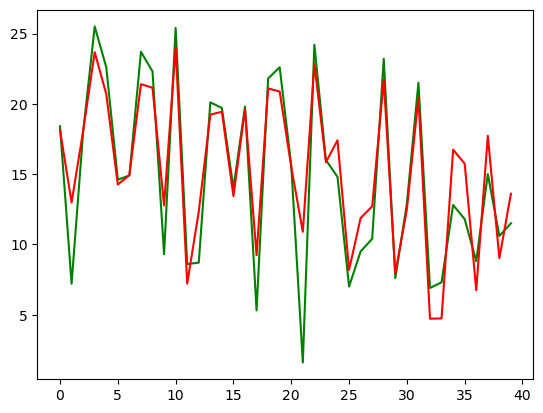

In [48]:
 
new_df["Actual sales"].plot(color='green')
new_df["Predicted sales"].plot(color='red')
plt.show()

In [49]:
lm.score(X_train,Y_train)         # the score can not be directlly coted to be client as it is based on the
                                  # training data which it is already aware of
                                  ### score training data pr kam krta hai 
#Y_pred=lm.predict(X_train)
#score=r2_score(Y_train,Y_pred)

0.9208692250787128

In [50]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse = np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
adjusted_r_squared =1-(1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1) ## len y = n ( total no of observation)
print("Adj R-square:",adjusted_r_squared)      ### ideally its a good modal bacause r2 and adj r2 is closer to each other 

R-squared: 0.8349807940441376
RMSE: 2.5915660600013997
Adj R-square: 0.8324549898713438


In [51]:
print(min(Y_test)) ## RMSE is near Y_test minimum value thus is a good rmse score( ) 
print(max(Y_test))    

1.6
25.5


In [52]:
new_df['Deviation']=new_df['Actual sales']-new_df['Predicted sales']
new_df.to_excel("Sales Prediction.xlsx",header=True,index=True) 
new_df.head()

,TV,radio,newspaper,Actual sales,Predicted sales,Deviation
0,210.7,29.5,1.203616,18.4,18.133215,0.266785
1,8.7,48.9,1.673489,7.2,12.978232,-5.778232
2,218.4,27.7,1.608710,18.0,18.069550,-0.069550
3,283.6,42.0,1.650133,25.5,23.672445,1.827555
4,216.4,41.7,1.548364,22.6,20.689317,1.910683


In [53]:
####ols - ordinary least square

In [54]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=10)
X_train

,TV,radio,newspaper
191,39.5,41.1,1.070529
8,120.2,19.6,1.262345
27,142.9,29.3,1.283727
139,43.0,25.9,1.403164
59,210.8,49.6,1.538122
...,...,...,...
114,209.6,20.6,1.241150
65,131.1,42.8,1.481118
16,195.4,47.7,1.606861
126,87.2,11.8,1.456782


In [55]:
from sklearn.linear_model import Ridge
rid = Ridge()
rid.fit(X_train,Y_train)


print(rid.intercept_)
print(rid.coef_)

#previous values
#3.3532913858151474
#[ 0.0437425   0.19303708 -0.04895137]

3.374791141649906
[ 0.0437296   0.19276649 -0.12005559]


In [56]:
Y_pred=rid.predict(X_test)
Y_pred

array([18.13072893, 12.98060849, 18.07183331, 23.67459115, 20.69034995,
       14.25682665, 14.92794087, 21.39941852, 21.14161005, 12.7757794 ,
       24.00514076,  7.21030867, 12.33296001, 19.23222285, 19.43641931,
       13.43054898, 19.60209864,  9.2298007 , 21.09746341, 20.86593922,
       15.50939161, 10.8966363 , 22.83876449, 15.84492745, 17.40510519,
        8.18817671, 11.86766135, 12.70739226, 21.69979092,  7.94340176,
       12.49839549, 20.43195741,  4.71705089,  4.73333337, 16.73577713,
       15.74565062,  6.7377564 , 17.71848795,  9.02244065, 13.60034727])

In [57]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse = np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
adjusted_r_squared =1-(1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)    ## len y = n ( total no of observation)
print("Adj R-square:",adjusted_r_squared)  

R-squared: 0.8350245476084104
RMSE: 2.591222470391179
Adj R-square: 0.8324994131330289


In [58]:
from sklearn.linear_model import Lasso
las = Lasso()
las.fit(X_train,Y_train)


print(las.intercept_)
print(las.coef_)

3.3367940582203186
[ 0.04362374  0.18766033 -0.        ]


In [59]:
Y_pred=las.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse = np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
adjusted_r_squared =1-(1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)    ## len y = n ( total no of observation)
print("Adj R-square:",adjusted_r_squared)  ### on the basis of these result we can conclude the modal without news paper is better than the modal with newspaper   

R-squared: 0.8360506658527163
RMSE: 2.5831514271094234
Adj R-square: 0.8335412372688292


In [60]:
from sklearn.linear_model import ElasticNet
en =ElasticNet(alpha=1,l1_ratio=0.1)      ## ratio  = 0.1 ye lasso value hai 90 aur 10 vala ratio
en.fit(X_train,Y_train)                   ## alpha indicates the panelty value a value close to one indicates to strong penalty  and value close to zero indicates a lopw panelty 
                                          # l1 panelty indictes the prob of being a lasso modal 0.5 indicates 50% lasso 50% ridge and 0.2 indicates 20 % lasso and 80% ridge 
print(las.intercept_)
print(las.coef_)

3.3367940582203186
[ 0.04362374  0.18766033 -0.        ]


## ratio  = 0.1 ye lasso value hai 90 aur 10 vala ratio                 
## alpha indicates the penalty value a value close to one indicates to strong penalty  and value close to zero indicates a low penalty 
 # l1 penalty indictes the prob of being a lasso modal 0.5 indicates 50% lasso 50% ridge and 0.2 indicates 20 % lasso and 80% ridge 

In [61]:
Y_pred=en.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse = np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
adjusted_r_squared =1-(1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)    ## len y = n ( total no of observation)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.8357167163642374
RMSE: 2.585780907944747
Adj R-square: 0.833202176308588


# OLS MODAL

In [62]:
#OLS -->OLS(Y_train,X_train)  ## blogs or books modal and all use capital OLS
#ols-->ols(Y~X1+X2+X3)    ## kind of equation and Formula API ka function then use small ols 
                          # both are different but ye dono ols aur linear regression hi krenge.

In [63]:
#fit9X_train , Y_train)-->sklearn
#Y~X1+X2+X3,data=df-->statsmodals

In [64]:
new_df=pd.DataFrame()
new_df=X_train.copy()
new_df["sales"]=Y_train.copy()
new_df.shape

(160, 4)

In [65]:
import statsmodels.formula.api as sm
 
# create a fitted model with all three features
lm_model = sm.ols(formula='sales ~ TV + radio + newspaper', 
                  data=new_df).fit()
 
# print the coefficients
print(lm_model.params)        ### params :- indicates parameter bita 0 ,bita 1,bita 2,bita 3
print(lm_model.summary())

Intercept    3.389917
TV           0.043730
radio        0.192806
newspaper   -0.131670
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     605.1
Date:                Wed, 24 Jul 2024   Prob (F-statistic):           1.13e-85
Time:                        15:55:44   Log-Likelihood:                -276.66
No. Observations:                 160   AIC:                             561.3
Df Residuals:                     156   BIC:                             573.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

 n-p-1 vala formula is used in observation
    

In [66]:
Y_pred_new=lm_model.predict(X_test)
Y_pred_new

60     18.133215
6      12.978232
21     18.069550
199    23.672445
53     20.689317
20     14.256915
163    14.927049
56     21.397711
70     21.141601
3      12.773463
99     24.003589
11      7.208977
76     12.330013
143    19.230965
125    19.433597
64     13.433271
110    19.606246
79      9.232096
112    21.097660
186    20.866840
155    15.511460
131    10.899555
62     22.837053
88     15.842683
103    17.404451
122     8.185622
137    11.870366
2      12.705811
48     21.700739
173     7.943558
160    12.496703
40     20.431300
77      4.715939
92      4.731005
36     16.737614
179    15.744413
128     6.739004
170    17.721504
47      9.020300
175    13.600768
dtype: float64

In [67]:
Y_pred=en.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse = np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
adjusted_r_squared =1-(1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)    ## len y = n ( total no of observation)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.8357167163642374
RMSE: 2.585780907944747
Adj R-square: 0.833202176308588


In [68]:
import statsmodels.formula.api as sm
 
# create a fitted model with all three features
lm_model = sm.ols(formula='sales ~ TV + radio ', 
                  data=new_df).fit()
 
# print the coefficients
print(lm_model.params)        ### params :- indicates parameter bita 0 ,bita1,bita 2,bita 3
print(lm_model.summary())   ### r2 adj r2 aic bic and durbin watson ,p value

Intercept    3.217026
TV           0.043721
radio        0.192425
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     912.9
Date:                Wed, 24 Jul 2024   Prob (F-statistic):           3.47e-87
Time:                        15:55:44   Log-Likelihood:                -276.70
No. Observations:                 160   AIC:                             559.4
Df Residuals:                     157   BIC:                             568.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

 r2 adj r2 aic bic and durbin watson ,p value  is focusing on above result........

In [69]:
Y_pred_new=lm_model.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse = np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
adjusted_r_squared =1-(1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)    ## len y = n ( total no of observation)
print("Adj R-square:",adjusted_r_squared) 

## out off all the modal we have tried lasso works the bst on the data and hence 
#we can used the lasso modal in order to do any future prediction

R-squared: 0.8357167163642374
RMSE: 2.585780907944747
Adj R-square: 0.833202176308588


# POST MODAL building assumptions 

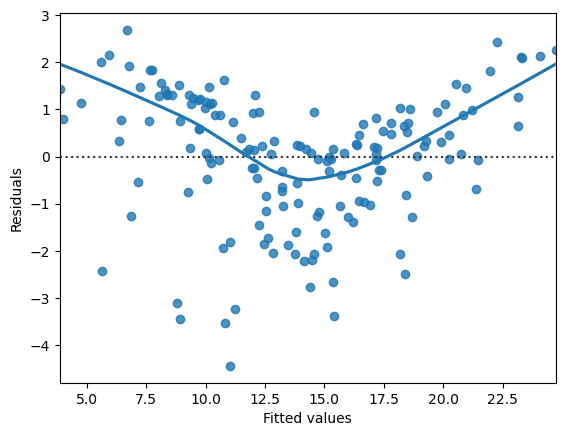

In [70]:
#Assumption: Errors should be random
#checked using Residual v/s Fitted plot
model_fitted_y = lm_model.fittedvalues
sns.residplot(x=model_fitted_y, y='sales', data=new_df, lowess=True)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

this graph is should show random line and not a wave like repitative pattern

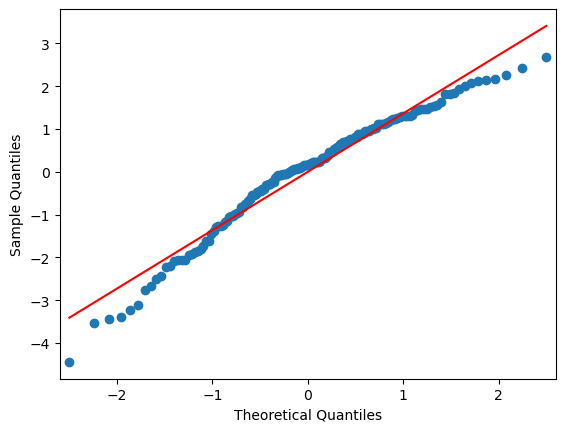

In [71]:
#Assumption: Errors should follow a approximate normal distribution
#checked using Normal QQ plot
import statsmodels.api as sma
sma.qqplot(lm_model.resid, line='s')
plt.show()

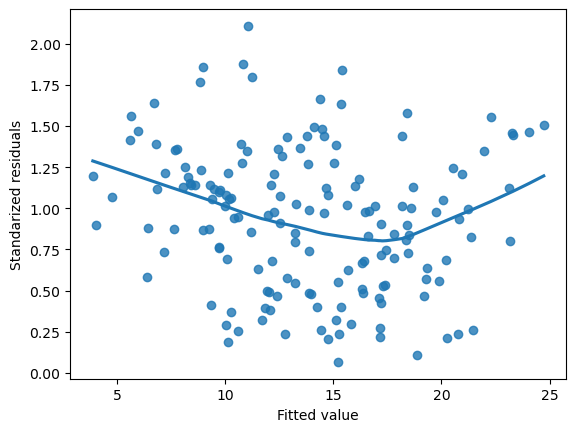

In [72]:
#Assumption: Errors should follow a constant variance-->Homoskedasticity
#checked using Scale location plot
model_norm_residuals_abs_sqrt=np.sqrt(np.abs(lm_model.resid))
 
sns.regplot(x=lm_model.fittedvalues,
            y=model_norm_residuals_abs_sqrt,
              scatter=True, lowess=True)        
plt.ylabel("Standarized residuals")
plt.xlabel("Fitted value")
plt.show()